In [2]:
#K Nearest Neighbour

In [3]:
#Given Details about Loan with unknown columns

In [4]:
#Target is to find weather the person\customer got the loan or not

In [5]:
#importing Classess

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
#importing the data file

In [8]:
Data = pd.read_csv(r"C:\Users\SEENIVAS\Downloads\KNN_project_Data")

In [9]:
Data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


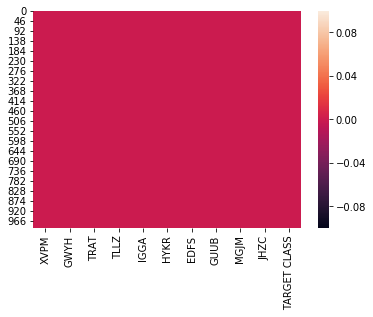

In [10]:
sns.heatmap(Data.isnull())

In [11]:
#NO null values

In [12]:
#Building Model

In [13]:
#Scaling the Data

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(Data.drop("TARGET CLASS",axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
scaled_features=scaler.transform(Data.drop("TARGET CLASS",axis=1))

In [19]:
Data_1= pd.DataFrame(scaled_features,columns=Data.columns[:-1])

In [20]:
Data_1.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [21]:
#train test
from sklearn.model_selection import train_test_split

In [22]:
X = Data_1
y = Data['TARGET CLASS']

In [23]:
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.40, random_state=101)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
#finding the best K value

In [28]:
error_rate=[]

In [29]:
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predit_1 = knn.predict(X_test)
    error_rate.append(np.mean(predit_1 != y_test))
    

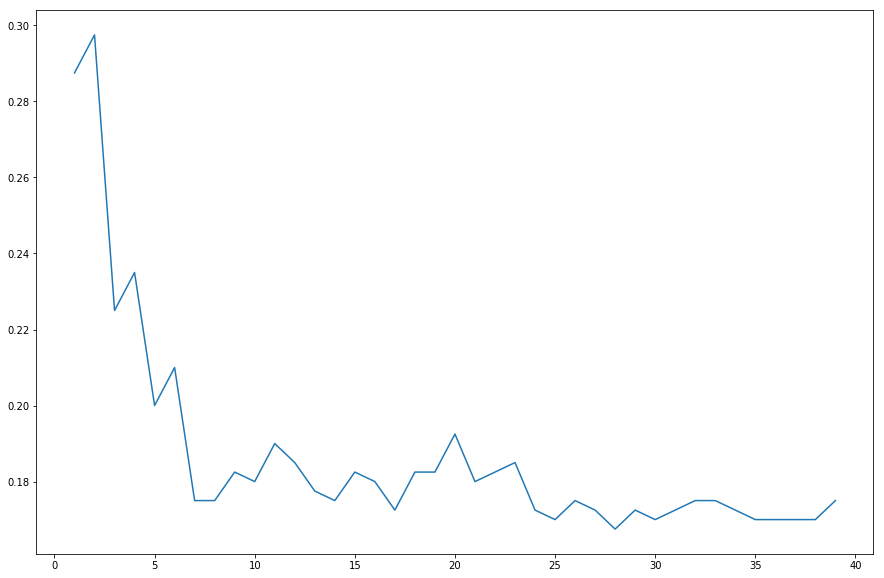

In [32]:
plt.figure(figsize=(15,10))
plt.plot(range(1,40),error_rate)
plt.show()


In [36]:
#thus K value can be 28 for higher accuracy

In [37]:
knn = KNeighborsClassifier(n_neighbors=28)
knn.fit(X_train,y_train)
predit_1 = knn.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(confusion_matrix(y_test,predit_1))

[[166  33]
 [ 34 167]]


In [41]:
print(classification_report(y_test,predit_1))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       199
           1       0.83      0.83      0.83       201

   micro avg       0.83      0.83      0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400

